## Phase Based Motion Magnification With Fourier Transform (Limitations)

This notebook implements a phase based motion magnification pipeline using the fourier transformation to creat basic intuitions regarding the signal processing procedure involved in motion magnification. Using fourier transformation for motion magnification faces lots of limitations because the kernel functions are not localized in space (the impulse respose is not limited); therefore, this pipeline fails to handle function that consists of two object with seperate motions.

In order to overcome this drawback the original motion magnification algorithm uses Gabor wavelets as the kernel functions which may be discussed in another notebook.

In [28]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [58]:
"""This function creats a 2D gaussian surface, we will be using this gaussian surfaces to creat the frame of our virtual video.""" 
def Gaussian(x0, y0, sigmax, sigmay, theta):
    imagelb = -15
    imageup = 15

    n_pixels = 512

    [X,Y] = np.meshgrid(np.linspace(imagelb,imageup,n_pixels),np.linspace(imagelb,imageup,n_pixels))

    A = 1

    a = cos(theta)**2/(2*sigmax**2) + sin(theta)**2/(2*sigmay**2)
    b = -sin(2*theta)/(4*sigmax**2) + sin(2*theta)/(4*sigmay**2)
    c = sin(theta)**2/(2*sigmax**2) + cos(theta)**2/(2*sigmay**2)


    Z = A*np.exp(-(a*np.power(X-x0,2) - 2*b*(X-x0)*(Y-y0) + c*np.power(Y-y0,2)))
    
    return Z

The code cell below uses the gaussian function to generate a virtual frame consisting of two gaussians. The gaussians can be assumed as two different object in an image.

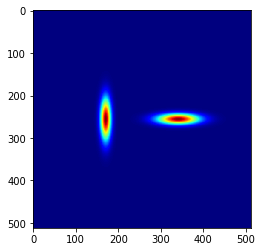

In [64]:

x0 = -5
y0 = 0
sigmax = 0.5
sigmay = 2
theta = 0
Z1 = Gaussian(x0, y0, sigmax, sigmay, theta)

x0 = 5
y0 = 0
sigmax = 2
sigmay = 0.5
theta = 0
Z2 = Gaussian(x0, y0, sigmax, sigmay, theta)

Z =Z1 + Z2

plt.imshow(Z, cmap = 'jet')

The generate_frame() function inputs two motions and applies each of the motions to one of the gaussian surfaces (objects in the scene) to generate the next frame of video. This will creat a new frame of the video where the gaussian surfaces are slightly moved.

In [180]:
def generate_frame(motion1,motion2):
    
    x0 = -5
    y0 = 0
    sigmax = 0.5
    sigmay = 2
    theta = 0
    Z1 = Gaussian(x0 + motion1, y0, sigmax, sigmay, theta)
    
    x0 = 5
    y0 = 0
    sigmax = 2
    sigmay = 0.5
    theta = 0
    Z2 = Gaussian(x0 + motion2, y0, sigmax, sigmay, theta)

    Z = Z1 + Z2
    
    return Z

In [211]:
# First Frame , no motion is not applied
frame1 = generate_frame(0,0) 

frame2 = generate_frame(1, 1)

Text(0.5,1,'Frame 2')

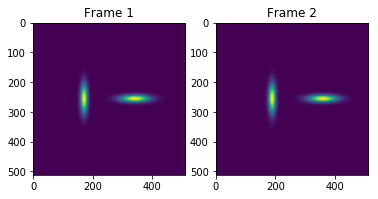

In [212]:
fig,axs = plt.subplots(1,2)

axs.ravel()
axs[0].imshow(frame1)
axs[0].set_title("Frame 1")

axs[1].imshow(frame2)
axs[1].set_title("Frame 2")

Function motion_magnify() inputs the first and second frames of the video and alpha as the magnification factor. This function transfroms both frames to the frequency domain. The phase difference between the frames are computed and magnified by a factor of alpha. This difference is used to generate the new phase values which will be used to recunstruct the new frame which should have larger motions for $alpha$>$1$.

$alpha$>$1$ : returns the same second frame without any magnification.

In [213]:
# Frequency domain representation
def motion_magnify(frame1, frame2,alpha):
    
    F1 = np.fft.fft2(frame1)
    F2 = np.fft.fft2(frame2)
    
    phi1 = np.angle(F1)
    phi2 = np.angle(F2)
    
    delta_phi = phi2 - phi1
    
    magnified_phi = phi1 + alpha*delta_phi
    
    amp2 = np.absolute(F2)
    
    x = amp2 * np.cos(magnified_phi)
    y = amp2 * np.sin(magnified_phi)
    
    magnified_fft = x + 1j*y
    
    magnified_img = np.real(np.fft.ifft2(magnified_fft)) 
    
    
    return magnified_img

The following cell show the motion magnified frame.In this frame the motion has been increased 6 times. As it is clear the motion magnification with FFT works very good for this simulated example because both object (Gaussian surfaces) are moved 1 unit to the write. 

Text(0.5,1,'Motion Magnified Frame')

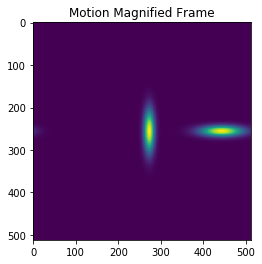

In [214]:
mag1 = motion_magnify(frame1, frame2, 6)

plt.imshow(mag1)
plt.title('Motion Magnified Frame')

The example shows the drawback of using FFT to generate a motion magnified frame. In this example the motion is not global. In fact the vertical gaussian is moving to the right while the horizontal gaussian is moving to the left, and that is where the FFT cannot handle the local motion, because the kernel functions of FFT are sinusoids (impulse response with infinite support).

For this reason Fourier Transfomration is not an option for generating motion magnified videos in presence of local motion(which is very likely to happen in real images captured from the cameras).

In order to be able to handle 

In [206]:
# First Frame , no motion is not applied
frame1 = generate_frame(0,0) 
frame2 = generate_frame(1, -1)

Text(0.5,1,'Frame 2')

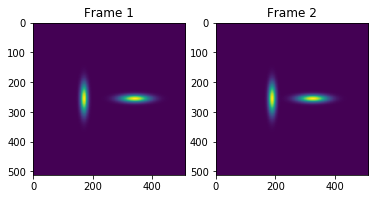

In [207]:
fig,axs = plt.subplots(1,2)

axs.ravel()
axs[0].imshow(frame1)
axs[0].set_title("Frame 1")

axs[1].imshow(frame2)
axs[1].set_title("Frame 2")

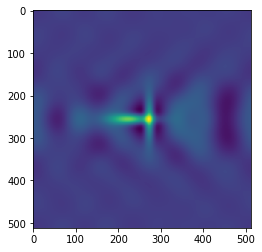

In [208]:
mag1 = motion_magnify(frame1, frame2, 6)

plt.imshow(mag1)